In [1]:
import drnb.embed.pipeline as pl

/home/james/dev/drnb-plugin/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Uniform Manifold Approximation with Two-phase Optimization (UMATO: [arxiv](https://arxiv.org/abs/2205.00420), [github](https://github.com/hyungkwonko/umato)) is a UMAP like method that lays out data in three stages: first, hubs (points with lots of neighbors) are laid out, then non-hubs, then outliers, with slightly different treatment of each, the idea being that the hubs represent the global layout of the data the best, while outliers tend to distort the layout. The authors claim that this gives better global preservation across multiple datasets.

Parameters you might want to play with:

* `n_neighbors=50`: larger than the default `15` with UMAP. 
* `hub_num=300`: the number of items in the dataset which are part of the global embedding.
* `global_n_epochs=None` (defaults to 100): number of epochs for the global hub embedding.
* `local_n_epochs=None` (defaults to 50): number of epochs for the local (non-hub but not outlier) embedding.
* `global_learning_rate=0.0065`: learning rate for the global embedding stage.
* `local_learning_rate=0.01`: learning rate for the local embedding stage.
* `gamma=0.1` This exists in the UMAP code base (in the API as `repulsion_strength`) but is rarely changed from its default value of 1 (which is like not using it). `gamma` is used in the UMATO code in a similar way. It is smaller than the default UMAP value (also to reduce the effect of hub interactions in the non-hub layout code), but the learning rates are even more reduced so it's not entirely clear to me what the overall effect would be.
* `init="pca"`. PCA initialization. Or: 
    * `"random"` (Gaussian with standard deviation 0.05)
    * `"spectral"` (the [sklearn SpectralEmbedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html) method)
    * or user-defined coordinates (although non-hub coordinates are ignored). 
    
    In the PCA, random and user-defined case, the coordinates are normalized to 0-1 by dividing by the largest value (so in the `"random"` case this changes the standard deviation to closer to 0.19).


[12:25:14] INFO     Getting dataset s1k                                              ]8;id=370892;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=703468;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#246\246]8;;\

           INFO     Embedding                                                        ]8;id=617449;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=761092;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     [external:umato] launching: /home/james/.local/bin/uv run        ]8;id=149659;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=483776;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#234\234]8;;\
                    --color never --quiet drnb-plugin-run.py --method umato                         
                    --request /tmp/drnb-umato-69xx7xrr/request.json                                 

[12:25:16] INFO     Running UMATO with params={'verbose': True}                      ]8;id=706610;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=362571;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     UMATO(a=np.float64(1.57694346046584),                            ]8;id=844334;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=585120;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\
                    b=np.float64(0.8950608779639974),                                               

           INFO           verbose=True)                                              ]8;id=312845;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=240434;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     Sat Nov 22 12:25:16 2025 Construct fuzzy simplicial set          ]8;id=671493;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=375237;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     Sat Nov 22 12:25:16 2025 Finding Nearest Neighbors               ]8;id=891640;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=552873;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     Sat Nov 22 12:25:16 2025 Building RP forest with 7 trees         ]8;id=544715;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=88658;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

[12:25:17] INFO     Sat Nov 22 12:25:17 2025 NN descent for 10 iterations            ]8;id=89889;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=919892;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

[12:25:24] INFO              0  /  10                                                ]8;id=116809;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=352712;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO              1  /  10                                                ]8;id=322225;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=980734;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO              2  /  10                                                ]8;id=942830;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=941328;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     Sat Nov 22 12:25:24 2025 Finished Nearest Neighbor Search        ]8;id=652236;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=892850;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     Sat Nov 22 12:25:24 2025 Build K-nearest neighbor graph          ]8;id=989889;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=570399;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\
                    structure                                                                       

[12:25:28] INFO     Sat Nov 22 12:25:28 2025 Run global optimization                 ]8;id=196082;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=576868;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

[12:25:29] INFO     [INFO] Current loss: 0.603543, @ iteration: 1/100                ]8;id=327870;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=830657;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.963805, @ iteration: 2/100                ]8;id=102643;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=186786;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.725502, @ iteration: 3/100                ]8;id=751352;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=432385;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.716907, @ iteration: 4/100                ]8;id=151318;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=908297;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.711992, @ iteration: 5/100                ]8;id=647285;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=138055;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715548, @ iteration: 6/100                ]8;id=269186;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=509302;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.713615, @ iteration: 7/100                ]8;id=766160;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=909851;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715437, @ iteration: 8/100                ]8;id=739484;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=952463;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.714717, @ iteration: 9/100                ]8;id=662577;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=65167;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715523, @ iteration: 10/100               ]8;id=829539;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=376007;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715258, @ iteration: 11/100               ]8;id=328242;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=943752;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715601, @ iteration: 12/100               ]8;id=123103;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=86653;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715496, @ iteration: 13/100               ]8;id=24578;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=249063;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

[12:25:30] INFO     [INFO] Current loss: 0.715663, @ iteration: 14/100               ]8;id=218655;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=693097;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715646, @ iteration: 15/100               ]8;id=923357;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=56088;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715748, @ iteration: 16/100               ]8;id=48170;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=896397;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715766, @ iteration: 17/100               ]8;id=845782;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=173089;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715828, @ iteration: 18/100               ]8;id=156760;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=67393;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715848, @ iteration: 19/100               ]8;id=995196;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=609690;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715883, @ iteration: 20/100               ]8;id=635866;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=597168;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715893, @ iteration: 21/100               ]8;id=14804;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=413897;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715902, @ iteration: 22/100               ]8;id=733612;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=470331;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715907, @ iteration: 23/100               ]8;id=866147;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=748121;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715919, @ iteration: 24/100               ]8;id=256361;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=437143;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715933, @ iteration: 25/100               ]8;id=198871;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=730843;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715953, @ iteration: 26/100               ]8;id=170475;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=123024;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715944, @ iteration: 27/100               ]8;id=908427;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=787362;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715926, @ iteration: 28/100               ]8;id=590420;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=923964;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715913, @ iteration: 29/100               ]8;id=992334;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=24830;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715905, @ iteration: 30/100               ]8;id=308462;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=297046;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715895, @ iteration: 31/100               ]8;id=59347;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=136683;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715886, @ iteration: 32/100               ]8;id=162070;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=161269;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715875, @ iteration: 33/100               ]8;id=471051;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=80715;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715843, @ iteration: 34/100               ]8;id=955142;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=5002;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715820, @ iteration: 35/100               ]8;id=675522;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=611294;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715808, @ iteration: 36/100               ]8;id=262063;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=100298;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715806, @ iteration: 37/100               ]8;id=547103;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=786570;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715810, @ iteration: 38/100               ]8;id=162504;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=277777;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715794, @ iteration: 39/100               ]8;id=263839;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=406538;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

[12:25:31] INFO     [INFO] Current loss: 0.715769, @ iteration: 40/100               ]8;id=429164;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=62296;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715758, @ iteration: 41/100               ]8;id=315806;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=638499;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715751, @ iteration: 42/100               ]8;id=182212;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=679715;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715753, @ iteration: 43/100               ]8;id=210048;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=217771;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715761, @ iteration: 44/100               ]8;id=580739;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=288906;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715773, @ iteration: 45/100               ]8;id=864818;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=359555;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715784, @ iteration: 46/100               ]8;id=793330;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=187488;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715793, @ iteration: 47/100               ]8;id=186373;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=738267;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715803, @ iteration: 48/100               ]8;id=171780;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=843744;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715815, @ iteration: 49/100               ]8;id=817936;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=842998;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715832, @ iteration: 50/100               ]8;id=51925;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=194259;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715853, @ iteration: 51/100               ]8;id=518478;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=874538;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715868, @ iteration: 52/100               ]8;id=742695;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=783136;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715877, @ iteration: 53/100               ]8;id=966506;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=394543;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715886, @ iteration: 54/100               ]8;id=614020;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=831458;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715892, @ iteration: 55/100               ]8;id=732318;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=10686;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715897, @ iteration: 56/100               ]8;id=591341;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=500947;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715901, @ iteration: 57/100               ]8;id=387174;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=129828;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715902, @ iteration: 58/100               ]8;id=633046;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=13726;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715901, @ iteration: 59/100               ]8;id=337815;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=262808;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715902, @ iteration: 60/100               ]8;id=272452;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=215463;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715905, @ iteration: 61/100               ]8;id=748183;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=833015;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715910, @ iteration: 62/100               ]8;id=567975;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=23343;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715911, @ iteration: 63/100               ]8;id=664143;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=390019;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715910, @ iteration: 64/100               ]8;id=591147;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=154558;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715909, @ iteration: 65/100               ]8;id=733250;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=541208;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715917, @ iteration: 66/100               ]8;id=614638;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=62227;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715902, @ iteration: 67/100               ]8;id=705844;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=877353;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715882, @ iteration: 68/100               ]8;id=698655;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=180823;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715871, @ iteration: 69/100               ]8;id=898337;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=868193;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715868, @ iteration: 70/100               ]8;id=339942;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=151483;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715867, @ iteration: 71/100               ]8;id=785024;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=923739;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

[12:25:32] INFO     [INFO] Current loss: 0.715865, @ iteration: 72/100               ]8;id=200148;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=686334;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715866, @ iteration: 73/100               ]8;id=573511;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=40212;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715855, @ iteration: 74/100               ]8;id=450542;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=121779;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715855, @ iteration: 75/100               ]8;id=646677;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=364889;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715866, @ iteration: 76/100               ]8;id=945012;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=897035;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715870, @ iteration: 77/100               ]8;id=110469;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=248439;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715859, @ iteration: 78/100               ]8;id=839067;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=717095;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715844, @ iteration: 79/100               ]8;id=487605;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=128069;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715831, @ iteration: 80/100               ]8;id=123842;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=782711;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715822, @ iteration: 81/100               ]8;id=699125;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=523424;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715813, @ iteration: 82/100               ]8;id=535598;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=360407;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715804, @ iteration: 83/100               ]8;id=444400;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=972340;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715796, @ iteration: 84/100               ]8;id=226206;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=191951;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715788, @ iteration: 85/100               ]8;id=222200;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=895848;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715781, @ iteration: 86/100               ]8;id=28454;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=621646;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715774, @ iteration: 87/100               ]8;id=869683;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=596395;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715768, @ iteration: 88/100               ]8;id=270902;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=732318;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715762, @ iteration: 89/100               ]8;id=670002;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=903096;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715757, @ iteration: 90/100               ]8;id=327696;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=165323;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715753, @ iteration: 91/100               ]8;id=313583;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=903964;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715749, @ iteration: 92/100               ]8;id=348016;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=300808;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715745, @ iteration: 93/100               ]8;id=613430;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=677326;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715742, @ iteration: 94/100               ]8;id=626245;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=247176;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715739, @ iteration: 95/100               ]8;id=912691;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=305973;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715736, @ iteration: 96/100               ]8;id=304962;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=672825;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715733, @ iteration: 97/100               ]8;id=716874;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=823044;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715731, @ iteration: 98/100               ]8;id=795799;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=851722;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     [INFO] Current loss: 0.715728, @ iteration: 99/100               ]8;id=510120;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=377831;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

[12:25:33] INFO     [INFO] Current loss: 0.715725, @ iteration: 100/100              ]8;id=883105;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=70391;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     Sat Nov 22 12:25:33 2025 Get NN indices & Initialize them using  ]8;id=839751;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=503679;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\
                    original hub information                                                        

[12:25:41] INFO     Sat Nov 22 12:25:41 2025 Run local optimization                  ]8;id=145294;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=95317;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

[12:25:42] INFO     Sat Nov 22 12:25:42 2025 Embedding outliers                      ]8;id=482584;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=302762;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

[12:25:46] INFO     Sat Nov 22 12:25:46 2025 Finished embedding                      ]8;id=194235;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=425064;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

           INFO     Saving results to /tmp/drnb-umato-69xx7xrr/result.npz            ]8;id=383776;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=885095;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

[12:25:47] INFO     Evaluating                                                       ]8;id=937864;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=805237;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     rte-5-euclidean                                                       ]8;id=823055;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=78213;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=525698;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=355830;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=167761;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=386166;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=112148;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=250531;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=237355;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=544457;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

[12:25:48] INFO     rpc-5-euclidean                                                       ]8;id=610248;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=28369;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=111983;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=464149;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/s1k.5.1337.idx.npy                  ]8;id=834095;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=243959;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=743318;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=135853;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=551734;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=916977;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                    ]8;id=82663;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=613079;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Plotting                                                         ]8;id=990029;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=614804;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#281\281]8;;\

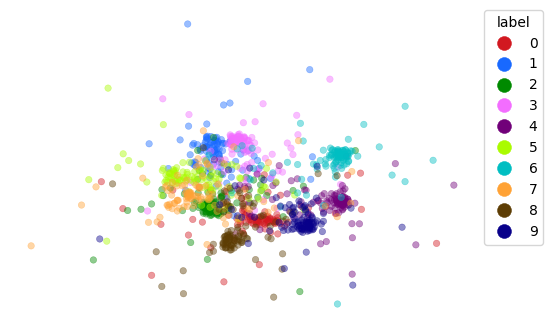

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.635), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.42152157), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.1943333333333333), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.33288), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.41718666666666665), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [2]:
pl.standard_eval(
    method="umato",
    params=dict(verbose=True),
    dataset="s1k",
    verbose=True,
)

[12:25:49] INFO     Getting dataset mnist                                            ]8;id=140013;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=783615;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#246\246]8;;\

[12:25:51] INFO     Embedding                                                        ]8;id=72508;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=952430;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#249\249]8;;\

           INFO     [external:umato] launching: /home/james/.local/bin/uv run        ]8;id=358409;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=580808;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#234\234]8;;\
                    --color never --quiet drnb-plugin-run.py --method umato                         
                    --request /tmp/drnb-umato-rb37jehb/request.json                                 

[12:25:54] INFO     Running UMATO with params={}                                     ]8;id=162200;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=803818;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

[12:30:04] INFO     Saving results to /tmp/drnb-umato-rb37jehb/result.npz            ]8;id=329911;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py\external.py]8;;\:]8;id=854151;file:///home/james/dev/drnb-plugin/src/drnb/plugins/external.py#347\347]8;;\

[12:30:05] INFO     Evaluating                                                       ]8;id=276556;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=249873;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#271\271]8;;\

           INFO     rte-5-euclidean                                                       ]8;id=56151;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=692556;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=482671;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=522751;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/mnist.5.1337.idx.npy                ]8;id=757945;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=970697;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#295\295]8;;\

           INFO     Also found corresponding euclidean distances                     ]8;id=697588;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=556210;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=479484;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=394881;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     rpc-5-euclidean                                                       ]8;id=203087;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=250139;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=18925;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=332265;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     Using triplets from triplets/mnist.5.1337.idx.npy                ]8;id=602370;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=174819;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#295\295]8;;\

[12:30:06] INFO     Also found corresponding euclidean distances                     ]8;id=164864;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=980651;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#298\298]8;;\

           INFO     Looking for precomputed triplets                                 ]8;id=854892;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py\triplets.py]8;;\:]8;id=932723;file:///home/james/dev/drnb-plugin/src/drnb/triplets.py#283\283]8;;\

           INFO     nnp-[15, 50, 150]-noself-euclidean                                    ]8;id=828199;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py\base.py]8;;\:]8;id=341386;file:///home/james/dev/drnb-plugin/src/drnb/eval/base.py#61\61]8;;\

[12:30:11] INFO     Plotting                                                         ]8;id=723205;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py\pipeline.py]8;;\:]8;id=632179;file:///home/james/dev/drnb-plugin/src/drnb/embed/pipeline.py#281\281]8;;\

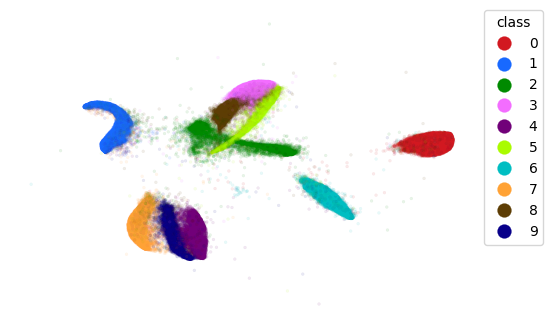

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.6377771428571429), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.42101946), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.06408190476190477), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.12890257142857142), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.21353628571428573), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [3]:
pl.standard_eval(
    method="umato",
    dataset="mnist",
    verbose=True,
)

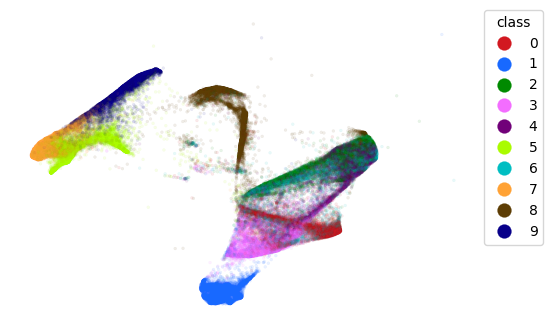

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.7712571428571429), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.67970407), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.07292285714285715), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.14116628571428574), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.22876028571428572), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [4]:
pl.standard_eval(method="umato", dataset="fashion")

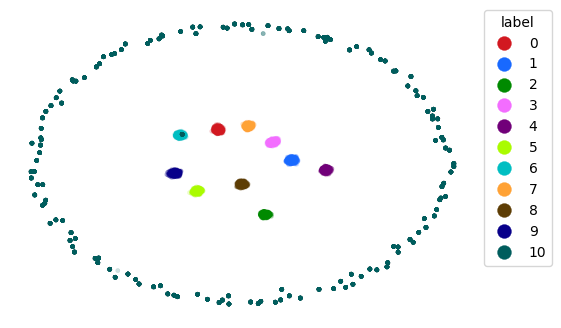

[EvalResult(eval_type='RTE', label='rte-5-euclidean', value=np.float64(0.6915), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='RPC', label='rpc-5-euclidean', value=np.float32(0.6827773), info={'metric': 'euclidean', 'ntpp': 5}),
 EvalResult(eval_type='NNP', label='nnp-15-noself-euclidean', value=np.float64(0.039573333333333335), info={'metric': 'euclidean', 'n_neighbors': 15}),
 EvalResult(eval_type='NNP', label='nnp-50-noself-euclidean', value=np.float64(0.07896000000000002), info={'metric': 'euclidean', 'n_neighbors': 50}),
 EvalResult(eval_type='NNP', label='nnp-150-noself-euclidean', value=np.float64(0.17423866666666668), info={'metric': 'euclidean', 'n_neighbors': 150})]

In [5]:
pl.standard_eval(method="umato", dataset="spheres")